## Regression Toy Example 

The Akane currently support _Ridge Regression_, _Lasso Regression_, etc. 

To get familiar with this package, the most intuitive way is always through the code. In this notebook, I will show you how to use Akane to explore linear regression models as well as a basic kernel regression model.

More specifically, this notebook doing the following:
- using Akane peform _feature selection_ by _Lasso Regression_
- using selected feature fitting the training data. 
- exploring _Polynomial Regression_ i.e. using polynomial features,
- exploring _Ridge Regression_
- exploring _Kernel Regression_

### Dataset

The dataset used in this notebook called **House Sales in King County**, which I downloaded from the _[Kaggle](https://www.kaggle.com)_. This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. 

It contains **19** house features, total **21613** observations.

more details about this dataset can be found [here](https://www.kaggle.com/harlfoxem/housesalesprediction).




In [1]:
import os
path = os.path.abspath("..")
import sys
sys.path.append(path)
# add akane source path to the environment
import Akane
import numpy as np
import pandas as pd
import utilities
import matplotlib.pyplot as plt
import regression
import models
%matplotlib inline  

#### Load data
the data located in 'data/...'

after that, we sort our dataset for plotting, otherwise the line we plotted will be in a mess! 

In [2]:
dataset = pd.read_csv('data\\kc_house_data.csv')

# sort data for plot
dataset = dataset.sort_values(by=['sqft_living','price'])

feature_names = list(dataset.columns)[3:]
target = ["price"]

#### Peform Lasso Regression

The Lasso regression can shrink most feature to 0 depends on the l1_penalty we set. Therefore, we can use Lasso Regression to do feature selection. 

we intentionally set *max_iteration* to a very large value. Note that the model converaged at step 106

In [3]:
dataset['(constant)'] = 1.
feature_names.append('(constant)')

dataset_normed = utilities.normalize_std(dataset,feature_names)
model = Akane.linear_regression(dataset_normed, target, feature_names,
                                l1_penalty=1e7,
                                solver='coordinate_descent',
                                max_iteration=10000,
                                tolerance = 1e0,
                               )

Starting Coordinate Descent
 Iteration:	0		      Cost:49370167742.773415
 Iteration:	1		      Cost:46321558510.672272
 Iteration:	2		      Cost:44124470741.693779
 Iteration:	3		      Cost:42213700163.252831
 Iteration:	4		      Cost:40561667502.559990
 Iteration:	5		      Cost:39139631749.010124
 Iteration:	6		      Cost:37916568232.438232
 Iteration:	7		      Cost:36865029707.816917
 Iteration:	8		      Cost:35962006266.777275
 Iteration:	9		      Cost:35188416657.081993
 Iteration:	10		      Cost:34528415350.100555
 Iteration:	11		      Cost:33968769646.660446
 Iteration:	12		      Cost:33498342819.217747
 Iteration:	13		      Cost:33150611712.325325
 Iteration:	14		      Cost:32887828825.177532
 Iteration:	15		      Cost:32697027628.473351
 Iteration:	16		      Cost:32566996507.467793
 Iteration:	17		      Cost:32488342123.932644
 Iteration:	18		      Cost:32452919202.656548
 Iteration:	19		      Cost:32453577203.484077
 Iteration:	20		      Cost:32484038674.695763
 Iteration:	21		

Take a look at the model weights.

the **Lasso Regression** shrink most weight value to zero depends on the scale of the *l1_penalty*

In [4]:
model.weights

bedrooms         0.000000e+00
bathrooms        0.000000e+00
sqft_living      5.639754e+07
sqft_lot         0.000000e+00
floors           0.000000e+00
waterfront       3.689657e+06
view             8.630250e+06
condition        0.000000e+00
grade            0.000000e+00
sqft_above       0.000000e+00
sqft_basement    0.000000e+00
yr_built         0.000000e+00
yr_renovated     0.000000e+00
zipcode          0.000000e+00
lat              0.000000e+00
long             0.000000e+00
sqft_living15    0.000000e+00
sqft_lot15       0.000000e+00
(constant)       2.496479e+07
dtype: float64

we select the biggest value as our selected feature

In [5]:
selected_features = ['sqft_living']
# selected_features=selected_features+['(constant)']

then use it to train a simple linear model

In [6]:
model = Akane.linear_regression(dataset, target, selected_features,
                                solver = 'lbfgs',
                                max_iteration=2000,
                                step_size = 1e-7,
                               )

Starting L-BFGS
 Iteration:	1		      Cost:116307541852.887756
 Iteration:	2		      Cost:34330595350.142323
 Iteration:	3		      Cost:34280729105.975754
 Iteration:	4		      Cost:34175643417.560131
 Iteration:	5		      Cost:34175643416.519920
 Iteration:	6		      Cost:34175643416.519920

Linear Regression:
-------------------------------------------------------------
  Number of Features:		2
Number of Coefficients:		2
              Solver:		lbfgs
  Number of Examples:		21613
-------------------------------------------------------------
           Iteration:		6
  Final Training RSS:		34175643416.5
        Elapsed Time:		0.13003087043762207


In above, we used **LBFGS** to train our linear model, while when input feature dimensiion are small, the **least square** may be the best solver should we use.

Then we plot it.

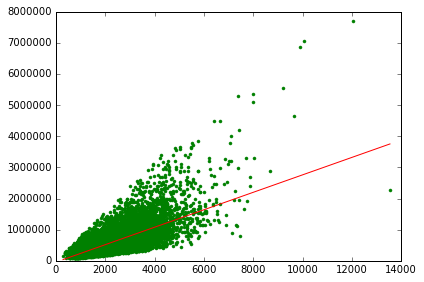

In [7]:
plt.plot(dataset['sqft_living'],dataset['price'],'g.',
         dataset['sqft_living'],model.predict(dataset),'r-')
plt.tight_layout()

#### Polynomial Regression

the linear model with only one feature is too weak to peform regression task, and usually cannot fit the dataset well.
Hence, we attempt to use polynomial features to enhance our model. 

In the following, I will use Akane to expolre how model behave under different power of given data.

In [8]:
models = []

# train 8 model w.r.t each power.
for power in range(1,9):
    dataset_pow = dataset.sort_values(by=['sqft_living','price'])
    dataset_pow = utilities.polynomial_features(dataset_pow, ['sqft_living'],power)
    feature_names = list(dataset_pow.columns)

    dataset_pow['(constant)'] = 1.
    feature_names.append('(constant)')
    dataset_pow['price'] = dataset['price']

    pow_model = Akane.linear_regression(dataset_pow, ['price'], feature_names,
                                    solver = 'least_square',)
    models.append(pow_model)

Linear Regression:
-------------------------------------------------------------
  Number of Features:		2
Number of Coefficients:		2
              Solver:		least_square
  Number of Examples:		21613
-------------------------------------------------------------
           Iteration:		1
  Final Training RSS:		34175643429.0
        Elapsed Time:		0.21446657180786133
Linear Regression:
-------------------------------------------------------------
  Number of Features:		3
Number of Coefficients:		3
              Solver:		least_square
  Number of Examples:		21613
-------------------------------------------------------------
           Iteration:		1
  Final Training RSS:		31487542330.6
        Elapsed Time:		0.005004167556762695
Linear Regression:
-------------------------------------------------------------
  Number of Features:		4
Number of Coefficients:		4
              Solver:		least_square
  Number of Examples:		21613
-------------------------------------------------------------
         

then plot it

we can see from the picture we plotted, with the increment of power, the model fitting the data better and better.

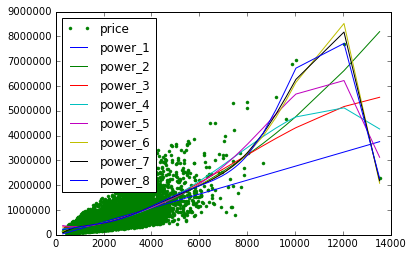

In [9]:
plt.plot(dataset_pow['sqft_living_1'],dataset_pow['price'],'g.')

for i in range(len(models)):
    plt.plot(dataset_pow['sqft_living_1'], models[i].predict(dataset_pow),label='power_'+str(i+1))
    
plt.legend(loc="upper left") 

When a model is excessively complex, it can lead to a problem called _overfitting_. In linear regression, we handle this problem by adding L2 Penalty term to our model. b.t.w. It is also called _Ridge Regression_

In the following, I will show you how model behave under defferent l2_penalty value.


In [10]:
dataset_pow = dataset.sort_values(by=['sqft_living','price'])
# create feature in power 8
dataset_pow = utilities.polynomial_features(dataset_pow, ['sqft_living'],8)
feature_names = list(dataset_pow.columns)

dataset_pow['(constant)'] = 1.
feature_names.append('(constant)')
dataset_pow['price'] = dataset['price']

dataset_pow_normed = utilities.normalize_rescaling(dataset_pow,feature_names)

l2_penaltys = np.append(np.linspace(1e-9,1e-1,5),np.linspace(1e0,1e3,5))

models=[]
for lamda in l2_penaltys:
    pow_model = Akane.linear_regression(dataset_pow_normed, ['price'], feature_names,
                                        solver = 'least_square',
                                        l2_penalty=lamda
                                       )
    models.append(pow_model)
    

Linear Regression:
-------------------------------------------------------------
  Number of Features:		9
Number of Coefficients:		9
              Solver:		least_square
  Number of Examples:		21613
-------------------------------------------------------------
           Iteration:		1
  Final Training RSS:		30226306349.9
        Elapsed Time:		0.008507966995239258
          L2_Penalty:		1e-09
Linear Regression:
-------------------------------------------------------------
  Number of Features:		9
Number of Coefficients:		9
              Solver:		least_square
  Number of Examples:		21613
-------------------------------------------------------------
           Iteration:		1
  Final Training RSS:		32077777307.7
        Elapsed Time:		0.008504629135131836
          L2_Penalty:		0.02500000075
Linear Regression:
-------------------------------------------------------------
  Number of Features:		9
Number of Coefficients:		9
              Solver:		least_square
  Number of Examples:		21613
----

Then plot it.

from the picture, we can find that with the increment of l2_penalty value, the model degraded to a simple model even though it used features with power 8!

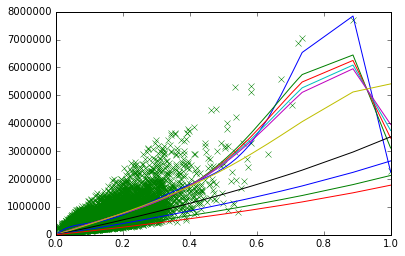

In [11]:
plt.plot(dataset_pow_normed['sqft_living_1'],dataset_pow_normed['price'],'gx')
for i in range(len(models)):
     plt.plot(dataset_pow_normed['sqft_living_1'],models[i].predict(dataset_pow_normed),label='l2 :'+str(l2_penaltys[i]))

# plt.legend(loc="upper left")

#### Kernel Regression

In the previous, we used linear model to fit the data. the parametric model makes strong hypothesis to the data, while in the Kernel Regreeion, a typical nonparametric regression technique, we make as less as possible hypothesis to the data.

In the following, I will use kernel regression (more specifically, the _Nadaraya–Watson kernel regression_, with Gaussian Kernel) show you how model behave under different bandwidth value.

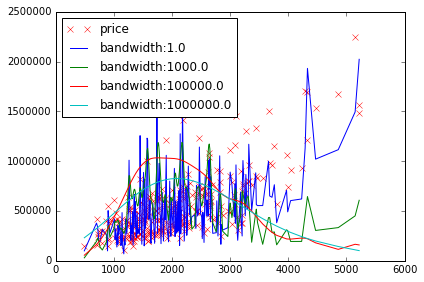

In [12]:
dataset = pd.read_csv('data\\kc_house_data.csv')
indices = np.random.choice(len(dataset),300)
subset = dataset.iloc[indices]
subset = subset.sort_values(by=['sqft_living','price'])
bandwidths =[1e0, 1e3, 1e5, 1e6]

plt.plot(subset['sqft_living'],subset['price'],'rx')
for bandwidth in bandwidths:
    model = Akane.kernel_regression(subset,['sqft_living'], target,kernel=lambda x: utilities.gaussian_kernel(x,bandwidth),silent_mode=True)
    plt.plot(subset['sqft_living'],model.predict(subset).mean(axis=1), label='bandwidth:'+str(bandwidth))

plt.legend(loc="upper left") 
plt.tight_layout()